In [116]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [117]:
#tujuan : mengkategorian komen positif dan negatif berdasarkan kalimat

import pandas as pd
df = pd.read_csv('amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')
df

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [118]:
#membagi data ke training data dan validation data

from sklearn.model_selection import train_test_split
sentence = df['sentence'].values
label = df['label'].values
sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2)

In [119]:
#proses tokonizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
     
tokenizer = Tokenizer(num_words=500, oov_token='x')
tokenizer.fit_on_texts(sentence_train) 
tokenizer.fit_on_texts(sentence_test)
     
sequence_sentence_train = tokenizer.texts_to_sequences(sentence_train)
sequence_sentence_test = tokenizer.texts_to_sequences(sentence_test)
     
padded_sentence_train = pad_sequences(sequence_sentence_train) 
padded_sentence_test = pad_sequences(sequence_sentence_test)

In [120]:
#membuat sistem callback

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
          print("\nAkurasi telah mencapai > 90%!")
          self.model.stop_training = True
callbacks = myCallback()

In [121]:
#membuat model

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
        layers.Embedding(500, 16),
        layers.LSTM(128),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, None, 16)          8000      
_________________________________________________________________
lstm_29 (LSTM)               (None, 128)               74240     
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params: 90,561
Trainable params: 90,561
Non-trainable params: 0
_________________________________________________

In [123]:
num_epochs = 30
history = model.fit(padded_sentence_train, label_train, epochs=num_epochs, validation_data=(padded_sentence_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
25/25 - 1s - loss: 0.6928 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.4700
Epoch 2/30
25/25 - 1s - loss: 0.6827 - accuracy: 0.5650 - val_loss: 0.6693 - val_accuracy: 0.5750
Epoch 3/30
25/25 - 1s - loss: 0.5935 - accuracy: 0.7725 - val_loss: 0.5390 - val_accuracy: 0.7600
Epoch 4/30
25/25 - 1s - loss: 0.4302 - accuracy: 0.8325 - val_loss: 0.5123 - val_accuracy: 0.7650
Epoch 5/30
25/25 - 1s - loss: 0.3032 - accuracy: 0.8888 - val_loss: 0.4866 - val_accuracy: 0.8000
Epoch 6/30

Akurasi telah mencapai > 90%!
25/25 - 1s - loss: 0.2356 - accuracy: 0.9162 - val_loss: 0.5105 - val_accuracy: 0.8000


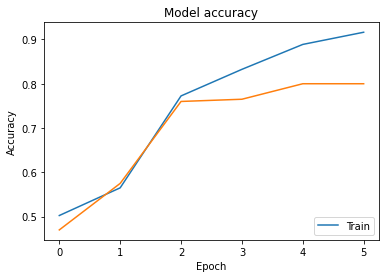

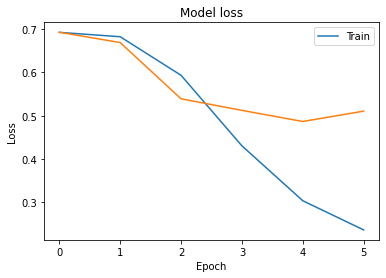

In [124]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Loss')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()